<a href="https://colab.research.google.com/github/kittimaxz/DWDM21/blob/main/Chapter6_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import os

In [80]:
from google.colab import drive ### เชื่อม google colab กับ google drive
drive.mount('/content/drive') ### mount คือคำสั่งใช้เชื่อมกัน
path = '/content/drive/My Drive/DWDM2021_DATA' # เป็นการชี้ที่อยู่ของไฟล์ที่อยู่ใน folder ใน drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [82]:
data.sort_values(by=['InvoiceNo'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/09/2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/09/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/09/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/09/2011 11:58,1.25,17315.0,United Kingdom


In [83]:
data[data['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/01/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/01/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/09/2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/09/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/09/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/09/2011 11:58,1.25,17315.0,United Kingdom


In [84]:
data[data['InvoiceNo'].str.contains('536391')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/01/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/01/2010 10:24,1.65,17548.0,United Kingdom


In [85]:
data[data['CustomerID'] == 17548]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/01/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/01/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/01/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/01/2010 10:24,1.65,17548.0,United Kingdom
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,4/20/2011 12:01,1.25,17548.0,United Kingdom
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,4/20/2011 12:01,1.65,17548.0,United Kingdom
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,4/20/2011 12:01,1.65,17548.0,United Kingdom


# ลบ records ที่ถูก cancel ออกไป

In [86]:
data_clean = data[data['Quantity']>=1]
data_clean

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


# [Q] มีประเทศสาขาของ supermarket นี้ทั้งหมดกี่ประเทศ

In [87]:
set(data['Country'])

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brazil',
 'Canada',
 'Channel Islands',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'EIRE',
 'European Community',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hong Kong',
 'Iceland',
 'Israel',
 'Italy',
 'Japan',
 'Lebanon',
 'Lithuania',
 'Malta',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'RSA',
 'Saudi Arabia',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'USA',
 'United Arab Emirates',
 'United Kingdom',
 'Unspecified'}

In [88]:
len(set(data['Country']))

38

# [HW13] วาดกราฟสรุปจำนวน items และ ยอดขายของแต่ละประเทศ

In [89]:
import matplotlib.pyplot as plt

In [90]:
import numpy as np

In [91]:
data_q = data.groupby('Country').sum().sort_values('Quantity')
data_cq = data_q.iloc[:,:2]
data_cq

,Quantity,UnitPrice
Country,,
Saudi Arabia,75,2.411000e+01
Bahrain,260,8.657000e+01
RSA,352,2.481000e+02
Brazil,356,1.426000e+02
Lebanon,386,2.424400e+02
European Community,497,2.940500e+02
Czech Republic,592,8.815000e+01
Lithuania,652,9.944000e+01
Malta,944,6.660100e+02


In [92]:
data_tp = data_cq['Quantity'] * data_cq['UnitPrice']
data_tp

Country
Saudi Arabia            1.808250e+03
Bahrain                 2.250820e+04
RSA                     8.733120e+04
Brazil                  5.076560e+04
Lebanon                 9.358184e+04
European Community      1.461428e+05
Czech Republic          5.218480e+04
Lithuania               6.483488e+04
Malta                   6.287134e+05
United Arab Emirates    2.257520e+05
USA                     6.669093e+05
Greece                  1.109879e+06
Iceland                 1.182814e+06
Canada                  2.515933e+06
Unspecified             3.973233e+06
Poland                  5.195552e+06
Israel                  4.697061e+06
Hong Kong               5.837971e+07
Austria                 8.213237e+06
Singapore               1.314199e+08
Cyprus                  2.476308e+07
Italy                   3.103124e+07
Denmark                 1.037379e+07
Channel Islands         3.543772e+07
Finland                 4.039054e+07
Portugal                2.109474e+08
Norway                  1.2566

In [93]:
data_q= data_cq.iloc[:,:1]
data_q

,Quantity
Country,
Saudi Arabia,75
Bahrain,260
RSA,352
Brazil,356
Lebanon,386
European Community,497
Czech Republic,592
Lithuania,652
Malta,944


In [94]:
data_p = pd.DataFrame(data_tp, columns = ['TotalPrice'])
data_p

,TotalPrice
Country,
Saudi Arabia,1.808250e+03
Bahrain,2.250820e+04
RSA,8.733120e+04
Brazil,5.076560e+04
Lebanon,9.358184e+04
European Community,1.461428e+05
Czech Republic,5.218480e+04
Lithuania,6.483488e+04
Malta,6.287134e+05


In [95]:
sales_table = data_q.merge(data_p,how='left',left_on='Quantity',right_on='TotalPrice')
sales_table

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1127: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,Quantity,TotalPrice
0,75,NaN
1,260,NaN
2,352,NaN
3,356,NaN
4,386,NaN
5,497,NaN
6,592,NaN
7,652,NaN
8,944,NaN
9,982,NaN


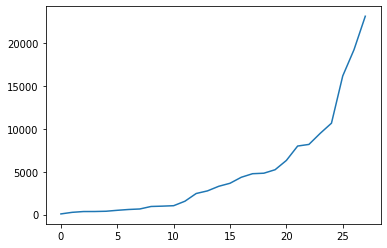

In [96]:
plt.plot(range(len(sales_table.iloc[:-10,:])),sales_table.iloc[:-10,:])

## เฉลย Homework

เพิ่ม column ราคารวม

In [97]:
data_clean['Total'] = data_clean['Quantity']*data_clean['UnitPrice']
data_clean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France,16.60


In [98]:
data_clean.groupby(['Country']).sum()

,Quantity,UnitPrice,CustomerID,Total
Country,,,,
Australia,84209,3.612500e+03,1.475853e+07,1.385213e+05
Austria,4881,1.693900e+03,4.982601e+06,1.019868e+04
Bahrain,314,8.276000e+01,2.100270e+05,7.541400e+02
Belgium,23237,7.372850e+03,2.524670e+07,4.119634e+04
Brazil,356,1.426000e+02,4.086080e+05,1.143600e+03
Canada,2763,9.105800e+02,2.615483e+06,3.666380e+03
Channel Islands,9491,3.389650e+03,1.113834e+07,2.045044e+04
Cyprus,6361,3.506180e+03,7.616904e+06,1.359038e+04
Czech Republic,671,7.827000e+01,3.195250e+05,8.267400e+02


In [99]:
data_clean[data_clean['InvoiceNo'].str.contains('A')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
299982,A563185,B,Adjust bad debt,1,08/12/2011 14:50,11062.06,NaN,United Kingdom,11062.06
299983,A563186,B,Adjust bad debt,1,08/12/2011 14:51,-11062.06,NaN,United Kingdom,-11062.06
299984,A563187,B,Adjust bad debt,1,08/12/2011 14:52,-11062.06,NaN,United Kingdom,-11062.06


 ## เตรียม Data สำหรับ (Fequence Pattern) 

In [100]:
data_clean.groupby('InvoiceNo')['StockCode'].apply(list)

InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
581586                          [22061, 23275, 21217, 20685]
581587     [22631, 22556, 22555, 22728, 22727, 22726, 227...
A563185                                                  [B]
A563186                                                  [B]
A563187                                                  [B]
Name: StockCode, Length: 20728, dtype: object

In [101]:
transactions = data_clean.groupby('InvoiceNo')['StockCode'].apply(list)

## Apriori

In [102]:
!pip install apyori

In [103]:
from apyori import apriori

In [106]:
frequentItemsets = list(apriori(transactions,min_support = 0.1))
frequentItemsets

[RelationRecord(items=frozenset({'85099B'}), support=0.10092628328830568, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85099B'}), confidence=0.10092628328830568, lift=1.0)]),
 RelationRecord(items=frozenset({'85123A'}), support=0.10628135854882285, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85123A'}), confidence=0.10628135854882285, lift=1.0)])]

In [108]:
frequentItemsets = list(apriori(transactions,min_support = 0.035))
frequentItemsets

[RelationRecord(items=frozenset({'20712'}), support=0.041634504052489384, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20712'}), confidence=0.041634504052489384, lift=1.0)]),
 RelationRecord(items=frozenset({'20719'}), support=0.040283674257043614, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20719'}), confidence=0.040283674257043614, lift=1.0)]),
 RelationRecord(items=frozenset({'20724'}), support=0.04988421458896179, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20724'}), confidence=0.04988421458896179, lift=1.0)]),
 RelationRecord(items=frozenset({'20725'}), support=0.07550173678116558, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725'}), confidence=0.07550173678116558, lift=1.0)]),
 RelationRecord(items=frozenset({'20726'}), support=0.04911231184870706, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozense

In [109]:
frequentItemsets[-1]

RelationRecord(items=frozenset({'22699', '22697'}), support=0.037051331532226936, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.037051331532226936, lift=1.0), OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7566502463054187, lift=14.71280141221268), OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7204502814258911, lift=14.71280141221268)])

RelationRecord
(items=frozenset({'22699', '22697'}), support=0.037051331532226936, 

ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.037051331532226936, lift=1.0), 

OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7566502463054187, lift=14.71280141221268), 

OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7204502814258911, lift=14.71280141221268)])


In [110]:
data_clean[data_clean['StockCode']=='22697']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
1086,536524,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/01/2010 12:51,2.95,17572.0,United Kingdom,17.70
1644,536544,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/01/2010 14:32,5.91,NaN,United Kingdom,35.46
2793,536592,22697,GREEN REGENCY TEACUP AND SAUCER,3,12/01/2010 17:06,5.91,NaN,United Kingdom,17.73
3357,536623,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/02/2010 10:39,2.95,15601.0,United Kingdom,35.40
3422,536627,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/02/2010 10:53,2.95,15658.0,United Kingdom,35.40
...,...,...,...,...,...,...,...,...,...
539148,581433,22697,GREEN REGENCY TEACUP AND SAUCER,6,12/08/2011 15:54,2.95,14911.0,EIRE,17.70
540215,581472,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/08/2011 19:55,2.95,15796.0,United Kingdom,35.40
540985,581492,22697,GREEN REGENCY TEACUP AND SAUCER,1,12/09/2011 10:03,5.79,NaN,United Kingdom,5.79
541220,581495,22697,GREEN REGENCY TEACUP AND SAUCER,12,12/09/2011 10:20,2.95,14051.0,United Kingdom,35.40


In [111]:
data_clean[data_clean['StockCode']=='22699']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
1077,536523,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/01/2010 12:50,2.95,12868.0,United Kingdom,17.70
1193,536530,22699,ROSES REGENCY TEACUP AND SAUCER,4,12/01/2010 13:21,2.95,17905.0,United Kingdom,11.80
1645,536544,22699,ROSES REGENCY TEACUP AND SAUCER,2,12/01/2010 14:32,5.91,NaN,United Kingdom,11.82
2794,536592,22699,ROSES REGENCY TEACUP AND SAUCER,4,12/01/2010 17:06,5.91,NaN,United Kingdom,23.64
3397,536624,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/02/2010 10:45,2.95,13418.0,United Kingdom,17.70
...,...,...,...,...,...,...,...,...,...
539671,581439,22699,ROSES REGENCY TEACUP AND SAUCER,6,12/08/2011 16:30,5.79,NaN,United Kingdom,34.74
540213,581472,22699,ROSES REGENCY TEACUP AND SAUCER,12,12/08/2011 19:55,2.95,15796.0,United Kingdom,35.40
540986,581492,22699,ROSES REGENCY TEACUP AND SAUCER,2,12/09/2011 10:03,5.79,NaN,United Kingdom,11.58
541218,581495,22699,ROSES REGENCY TEACUP AND SAUCER,12,12/09/2011 10:20,2.95,14051.0,United Kingdom,35.40


# Quiz

In [112]:
transactionss = data_clean.groupby('CustomerID')['StockCode'].apply(list)

In [120]:
frequentItemsetss = list(apriori(transactions,min_support = 0.035))
frequentItemsetss

[RelationRecord(items=frozenset({'20712'}), support=0.041634504052489384, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20712'}), confidence=0.041634504052489384, lift=1.0)]),
 RelationRecord(items=frozenset({'20719'}), support=0.040283674257043614, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20719'}), confidence=0.040283674257043614, lift=1.0)]),
 RelationRecord(items=frozenset({'20724'}), support=0.04988421458896179, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20724'}), confidence=0.04988421458896179, lift=1.0)]),
 RelationRecord(items=frozenset({'20725'}), support=0.07550173678116558, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725'}), confidence=0.07550173678116558, lift=1.0)]),
 RelationRecord(items=frozenset({'20726'}), support=0.04911231184870706, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozense

In [122]:
frequentItemsetss[-2]

RelationRecord(items=frozenset({'85099B', '22386'}), support=0.03980123504438441, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85099B', '22386'}), confidence=0.03980123504438441, lift=1.0), OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6773399014778325, lift=6.711233976019365), OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.39435946462715105, lift=6.711233976019366)])

In [123]:
data_clean[data_clean['StockCode']=='85099B']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,12/01/2010 09:57,1.65,16029.0,United Kingdom,165.00
234,536390,85099B,JUMBO BAG RED RETROSPOT,100,12/01/2010 10:19,1.65,17511.0,United Kingdom,165.00
533,536409,85099B,JUMBO BAG RED RETROSPOT,2,12/01/2010 11:45,1.95,17908.0,United Kingdom,3.90
790,536464,85099B,JUMBO BAG RED RETROSPOT,1,12/01/2010 12:23,1.95,17968.0,United Kingdom,1.95
1069,536522,85099B,JUMBO BAG RED RETROSPOT,1,12/01/2010 12:49,1.95,15012.0,United Kingdom,1.95
...,...,...,...,...,...,...,...,...,...
538603,581412,85099B,JUMBO BAG RED RETROSPOT,3,12/08/2011 14:38,2.08,14415.0,United Kingdom,6.24
538913,581421,85099B,JUMBO BAG RED RETROSPOT,9,12/08/2011 15:23,2.08,15898.0,United Kingdom,18.72
539338,581439,85099B,JUMBO BAG RED RETROSPOT,1,12/08/2011 16:30,4.13,NaN,United Kingdom,4.13
540434,581486,85099B,JUMBO BAG RED RETROSPOT,10,12/09/2011 09:38,2.08,17001.0,United Kingdom,20.80


In [124]:
data_clean[data_clean['StockCode']=='22386']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
86,536378,22386,JUMBO BAG PINK POLKADOT,10,12/01/2010 09:37,1.95,14688.0,United Kingdom,19.50
789,536464,22386,JUMBO BAG PINK POLKADOT,1,12/01/2010 12:23,1.95,17968.0,United Kingdom,1.95
1428,536542,22386,JUMBO BAG PINK POLKADOT,30,12/01/2010 14:11,1.95,16456.0,United Kingdom,58.50
2427,536591,22386,JUMBO BAG PINK POLKADOT,1,12/01/2010 16:57,1.95,14606.0,United Kingdom,1.95
2712,536592,22386,JUMBO BAG PINK POLKADOT,3,12/01/2010 17:06,4.21,NaN,United Kingdom,12.63
...,...,...,...,...,...,...,...,...,...
534742,581167,22386,JUMBO BAG PINK POLKADOT,20,12/07/2011 14:52,2.08,13534.0,United Kingdom,41.60
537138,581238,22386,JUMBO BAG PINK POLKADOT,5,12/08/2011 10:53,4.13,NaN,United Kingdom,20.65
539585,581439,22386,JUMBO BAG PINK POLKADOT,2,12/08/2011 16:30,4.13,NaN,United Kingdom,8.26
541421,581498,22386,JUMBO BAG PINK POLKADOT,1,12/09/2011 10:26,4.13,NaN,United Kingdom,4.13


RelationRecord(items=frozenset({'85099B', '22386'}), support=0.03980123504438441, 

ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'85099B', '22386'}), confidence=0.03980123504438441, lift=1.0), 

OrderedStatistic(items_base=frozenset({'22386'}), items_add=frozenset({'85099B'}), confidence=0.6773399014778325, lift=6.711233976019365), 

OrderedStatistic(items_base=frozenset({'85099B'}), items_add=frozenset({'22386'}), confidence=0.39435946462715105, lift=6.711233976019366)])


**สรุป**

     หากลูกค้าซื้อ JUMBO BAG RED RETROSPOT จะซื้อ JUMBO BAG PINK POLKADOT ไปด้วย โดยมีค่า confidence = 67 % ที่ค่า support = 3 % ซึ่งมีค่า lift มากกว่า 1